In [1]:
# Import necessary library for file upload
from google.colab import files
import pandas as pd

# Upload the file
uploaded = files.upload()

Saving imdb_top_1000.csv to imdb_top_1000.csv


In [2]:
import pandas as pd

# Load the IMDB Top 1000 dataset
df_imdb = pd.read_csv('imdb_top_1000.csv')

# Display the first few rows of the dataset
print(df_imdb.head())

# Check the structure of the dataset (columns, missing values)
print("\nDataset Information:")
df_imdb.info()

# Check for missing values
print("\nMissing values:")
print(df_imdb.isnull().sum())


                                         Poster_Link  \
0  https://m.media-amazon.com/images/M/MV5BMDFkYT...   
1  https://m.media-amazon.com/images/M/MV5BM2MyNj...   
2  https://m.media-amazon.com/images/M/MV5BMTMxNT...   
3  https://m.media-amazon.com/images/M/MV5BMWMwMG...   
4  https://m.media-amazon.com/images/M/MV5BMWU4N2...   

               Series_Title Released_Year Certificate  Runtime  \
0  The Shawshank Redemption          1994           A  142 min   
1             The Godfather          1972           A  175 min   
2           The Dark Knight          2008          UA  152 min   
3    The Godfather: Part II          1974           A  202 min   
4              12 Angry Men          1957           U   96 min   

                  Genre  IMDB_Rating  \
0                 Drama          9.3   
1          Crime, Drama          9.2   
2  Action, Crime, Drama          9.0   
3          Crime, Drama          9.0   
4          Crime, Drama          9.0   

                         

In [3]:
# Check for missing values
print("\nMissing values in the IMDB dataset:")
print(df_imdb.isnull().sum())

# Fill missing values if necessary or drop rows/columns with missing data
df_imdb['Meta_score'].fillna(df_imdb['Meta_score'].mean(), inplace=True)
df_imdb['Runtime'].fillna(df_imdb['Runtime'].mode()[0], inplace=True)

# Drop rows with missing values in important columns (e.g., Series_Title, Genre, IMDB_Rating)
df_imdb.dropna(subset=['Series_Title', 'Genre', 'IMDB_Rating'], inplace=True)



Missing values in the IMDB dataset:
Poster_Link        0
Series_Title       0
Released_Year      0
Certificate      101
Runtime            0
Genre              0
IMDB_Rating        0
Overview           0
Meta_score       157
Director           0
Star1              0
Star2              0
Star3              0
Star4              0
No_of_Votes        0
Gross            169
dtype: int64


<ipython-input-3-2c5e2d327bf8>:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_imdb['Meta_score'].fillna(df_imdb['Meta_score'].mean(), inplace=True)
<ipython-input-3-2c5e2d327bf8>:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, in

In [4]:
# Handle missing values

# Fill missing 'Meta_score' with the mean of the column
df_imdb['Meta_score'] = df_imdb['Meta_score'].fillna(df_imdb['Meta_score'].mean())

# Fill missing 'Runtime' with the most frequent value (mode)
df_imdb['Runtime'] = df_imdb['Runtime'].fillna(df_imdb['Runtime'].mode()[0])

# Drop rows with missing 'Series_Title', 'Genre', or 'IMDB_Rating'
df_imdb.dropna(subset=['Series_Title', 'Genre', 'IMDB_Rating'], inplace=True)

# Optionally fill missing 'Certificate' with 'Not Available' or a placeholder
df_imdb['Certificate'] = df_imdb['Certificate'].fillna('Not Available')

# Optionally fill missing 'Gross' with 0 or a placeholder if this column is essential
df_imdb['Gross'] = df_imdb['Gross'].fillna(0)

# Check again for missing values
print("\nMissing values after handling:")
print(df_imdb.isnull().sum())



Missing values after handling:
Poster_Link      0
Series_Title     0
Released_Year    0
Certificate      0
Runtime          0
Genre            0
IMDB_Rating      0
Overview         0
Meta_score       0
Director         0
Star1            0
Star2            0
Star3            0
Star4            0
No_of_Votes      0
Gross            0
dtype: int64


In [5]:
# Clean the 'Runtime' column by extracting the numeric part
df_imdb['Runtime'] = df_imdb['Runtime'].str.extract('(\d+)').astype(float)

# Verify the changes
print("\nUnique values in 'Runtime' after cleaning:")
print(df_imdb['Runtime'].unique())



Unique values in 'Runtime' after cleaning:
[142. 175. 152. 202.  96. 201. 154. 195. 148. 139. 178. 161. 179. 136.
 146. 124. 133. 160. 132. 153. 169. 130. 125. 189. 116. 127. 118. 121.
 207. 122. 106. 112. 151. 150. 155. 119. 110.  88. 137.  89. 165. 109.
 102.  87. 126. 147. 117. 181. 149. 105. 164. 170.  98. 101. 113. 134.
 229. 115. 143.  95. 104. 123. 131. 108.  81.  99. 114. 129. 228. 128.
 103. 107.  68. 138. 156. 167. 163. 186. 321. 135. 140. 180. 158. 210.
  86. 162. 177. 204.  91. 172.  45. 145. 100. 196.  93. 120.  92. 144.
  80. 183. 111. 141. 224. 171. 188.  94. 185.  85. 205. 212. 238.  72.
  67.  76. 159.  83.  90.  84. 191. 197. 174.  97.  75. 157. 209.  82.
 220.  64. 184. 168. 166. 192. 194. 193.  69.  70. 242.  79.  71.  78.]


In [6]:
# Split the 'Genre' column into individual genres and create a binary matrix
genre_dummies = df_imdb['Genre'].str.get_dummies(sep=', ')

# Merge the new genre columns into the dataframe
df_imdb = pd.concat([df_imdb, genre_dummies], axis=1)

# Check the first few rows to verify the changes
print("\nDataframe with one-hot encoded genres:")
print(df_imdb.head())



Dataframe with one-hot encoded genres:
                                         Poster_Link  \
0  https://m.media-amazon.com/images/M/MV5BMDFkYT...   
1  https://m.media-amazon.com/images/M/MV5BM2MyNj...   
2  https://m.media-amazon.com/images/M/MV5BMTMxNT...   
3  https://m.media-amazon.com/images/M/MV5BMWMwMG...   
4  https://m.media-amazon.com/images/M/MV5BMWU4N2...   

               Series_Title Released_Year Certificate  Runtime  \
0  The Shawshank Redemption          1994           A    142.0   
1             The Godfather          1972           A    175.0   
2           The Dark Knight          2008          UA    152.0   
3    The Godfather: Part II          1974           A    202.0   
4              12 Angry Men          1957           U     96.0   

                  Genre  IMDB_Rating  \
0                 Drama          9.3   
1          Crime, Drama          9.2   
2  Action, Crime, Drama          9.0   
3          Crime, Drama          9.0   
4          Crime, Drama   

In [9]:
# One-hot encode the 'Certificate' column
certificate_dummies = pd.get_dummies(df_imdb['Certificate'], prefix='Certificate')

# Concatenate the one-hot encoded certificate columns to the dataframe
df_imdb = pd.concat([df_imdb, certificate_dummies], axis=1)

# Drop the original 'Certificate' column as it is now encoded
df_imdb.drop(columns=['Certificate'], inplace=True)


In [10]:
# Fill any missing values in 'IMDB_Rating' and 'Meta_score' with the mean
df_imdb['IMDB_Rating'].fillna(df_imdb['IMDB_Rating'].mean(), inplace=True)
df_imdb['Meta_score'].fillna(df_imdb['Meta_score'].mean(), inplace=True)


<ipython-input-10-f9b0f81788f9>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_imdb['IMDB_Rating'].fillna(df_imdb['IMDB_Rating'].mean(), inplace=True)
<ipython-input-10-f9b0f81788f9>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value

In [11]:
# Define features (X) and target variable (y)
X = df_imdb.drop(columns=['IMDB_Rating', 'Series_Title', 'Poster_Link', 'Overview'])  # Drop non-numeric features
y = df_imdb['IMDB_Rating']  # Target variable (IMDB Rating)


In [12]:
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Training set size: {X_train.shape[0]}")
print(f"Test set size: {X_test.shape[0]}")


Training set size: 800
Test set size: 200


In [15]:
# One-hot encode the 'Genre' column (splitting multiple genres into separate columns)
df_imdb_genres = df_imdb['Genre'].str.get_dummies(sep=', ')

# Combine the encoded genres with the rest of the dataset (except for 'Genre' column)
df_imdb_clean = df_imdb.drop(columns=['Genre'])
df_imdb_clean = pd.concat([df_imdb_clean, df_imdb_genres], axis=1)

# Handle missing values: fill with the mean for 'Meta_score' and 'Runtime'
df_imdb_clean['Meta_score'].fillna(df_imdb_clean['Meta_score'].mean(), inplace=True)
df_imdb_clean['Runtime'] = df_imdb_clean['Runtime'].apply(lambda x: str(x).replace(' min', '') if isinstance(x, str) else x)
df_imdb_clean['Runtime'] = pd.to_numeric(df_imdb_clean['Runtime'], errors='coerce')
df_imdb_clean['Runtime'].fillna(df_imdb_clean['Runtime'].mean(), inplace=True)

# Now we have the cleaned dataset with one-hot encoded genres
df_imdb_clean.info()  # Check the structure after preprocessing


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 73 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Poster_Link                1000 non-null   object 
 1   Series_Title               1000 non-null   object 
 2   Released_Year              1000 non-null   object 
 3   Runtime                    1000 non-null   float64
 4   IMDB_Rating                1000 non-null   float64
 5   Overview                   1000 non-null   object 
 6   Meta_score                 1000 non-null   float64
 7   Director                   1000 non-null   object 
 8   Star1                      1000 non-null   object 
 9   Star2                      1000 non-null   object 
 10  Star3                      1000 non-null   object 
 11  Star4                      1000 non-null   object 
 12  No_of_Votes                1000 non-null   int64  
 13  Gross                      1000 non-null   object

<ipython-input-15-ae5f5897586f>:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_imdb_clean['Meta_score'].fillna(df_imdb_clean['Meta_score'].mean(), inplace=True)
<ipython-input-15-ae5f5897586f>:12: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].m

In [20]:
# Check the data types of your features (X_train)
print(X_train.dtypes)

# Check for missing values
print(X_train.isnull().sum())


Released_Year                 object
Runtime                      float64
Genre                         object
Meta_score                   float64
No_of_Votes                    int64
Action                         int64
Adventure                      int64
Animation                      int64
Biography                      int64
Comedy                         int64
Crime                          int64
Drama                          int64
Family                         int64
Fantasy                        int64
Film-Noir                      int64
History                        int64
Horror                         int64
Music                          int64
Musical                        int64
Mystery                        int64
Romance                        int64
Sci-Fi                         int64
Sport                          int64
Thriller                       int64
War                            int64
Western                        int64
Certificate_16                  bool
C

In [21]:
# Convert Released_Year to numeric (if possible)
df_imdb['Released_Year'] = pd.to_numeric(df_imdb['Released_Year'], errors='coerce')


In [22]:
# One-hot encode the 'Genre' column
df_imdb_genres = df_imdb['Genre'].str.get_dummies(', ')

# Concatenate with the rest of the dataframe
df_imdb = pd.concat([df_imdb, df_imdb_genres], axis=1)

# Drop the original Genre column
df_imdb.drop(columns=['Genre'], inplace=True)


In [23]:
# Drop certificate columns if not relevant
df_imdb.drop(columns=[col for col in df_imdb.columns if 'Certificate' in col], inplace=True)


In [24]:
# Check the final dataframe shape
print(df_imdb.shape)


(1000, 56)


In [26]:
# Check the type of y_train and convert if needed
print(y_train.head())

# If it's categorical, use label encoding
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
y_train = encoder.fit_transform(y_train)
y_test = encoder.transform(y_test)


29     8.6
535    7.9
695    7.8
557    7.9
836    7.7
Name: IMDB_Rating, dtype: float64


In [27]:
# Check the shape of X_train
print(X_train.shape)

# Ensure that the features are correctly encoded as numeric
X_train.head()


(800, 55)


,Poster_Link,Series_Title,Released_Year,Runtime,Overview,Meta_score,Director,Star1,Star2,Star3,...,Horror,Music,Musical,Mystery,Romance,Sci-Fi,Sport,Thriller,War,Western
29,https://m.media-amazon.com/images/M/MV5BNzVlY2...,Star Wars,1977.0,121.0,Luke Skywalker joins forces with a Jedi Knight...,90.00000,George Lucas,Mark Hamill,Harrison Ford,Carrie Fisher,...,0,0,0,0,0,0,0,0,0,0
535,https://m.media-amazon.com/images/M/MV5BMzc1YT...,Dawn of the Dead,1978.0,127.0,Following an ever-growing epidemic of zombies ...,71.00000,George A. Romero,David Emge,Ken Foree,Scott H. Reiniger,...,1,0,0,0,0,0,0,0,0,0
695,https://m.media-amazon.com/images/M/MV5BNjZmMW...,The Day of the Jackal,1973.0,143.0,"A professional assassin codenamed ""Jackal"" plo...",80.00000,Fred Zinnemann,Edward Fox,Terence Alexander,Michel Auclair,...,0,0,0,0,0,0,0,1,0,0
557,https://m.media-amazon.com/images/M/MV5BMzg2YT...,Harvey,1950.0,104.0,Due to his insistence that he has an invisible...,77.97153,Henry Koster,James Stewart,Wallace Ford,William H. Lynn,...,0,0,0,0,0,0,0,0,0,0
836,https://m.media-amazon.com/images/M/MV5BMTUxMj...,After Hours,1985.0,97.0,An ordinary word processor has the worst night...,90.00000,Martin Scorsese,Griffin Dunne,Rosanna Arquette,Verna Bloom,...,0,0,0,0,0,0,0,0,0,0


In [28]:
# Check the lengths of X_train and y_train
print(f"X_train shape: {X_train.shape[0]}, y_train shape: {len(y_train)}")


X_train shape: 800, y_train shape: 800


In [29]:
# Inspect the data types of your features
print(X_train.dtypes)


Poster_Link       object
Series_Title      object
Released_Year    float64
Runtime          float64
Overview          object
Meta_score       float64
Director          object
Star1             object
Star2             object
Star3             object
Star4             object
No_of_Votes        int64
Gross             object
Action             int64
Adventure          int64
Animation          int64
Biography          int64
Comedy             int64
Crime              int64
Drama              int64
Family             int64
Fantasy            int64
Film-Noir          int64
History            int64
Horror             int64
Music              int64
Musical            int64
Mystery            int64
Romance            int64
Sci-Fi             int64
Sport              int64
Thriller           int64
War                int64
Western            int64
Action             int64
Adventure          int64
Animation          int64
Biography          int64
Comedy             int64
Crime              int64


In [30]:
# Check for missing values in X_train and y_train
print(X_train.isnull().sum())
print(pd.Series(y_train).isnull().sum())


Poster_Link      0
Series_Title     0
Released_Year    1
Runtime          0
Overview         0
Meta_score       0
Director         0
Star1            0
Star2            0
Star3            0
Star4            0
No_of_Votes      0
Gross            0
Action           0
Adventure        0
Animation        0
Biography        0
Comedy           0
Crime            0
Drama            0
Family           0
Fantasy          0
Film-Noir        0
History          0
Horror           0
Music            0
Musical          0
Mystery          0
Romance          0
Sci-Fi           0
Sport            0
Thriller         0
War              0
Western          0
Action           0
Adventure        0
Animation        0
Biography        0
Comedy           0
Crime            0
Drama            0
Family           0
Fantasy          0
Film-Noir        0
History          0
Horror           0
Music            0
Musical          0
Mystery          0
Romance          0
Sci-Fi           0
Sport            0
Thriller    

In [32]:
# Fill missing values in 'Released_Year' with the mode (most frequent value)
df_imdb['Released_Year'] = df_imdb['Released_Year'].fillna(df_imdb['Released_Year'].mode()[0])


In [33]:
print(df_imdb.isnull().sum())


Poster_Link      0
Series_Title     0
Released_Year    0
Runtime          0
IMDB_Rating      0
Overview         0
Meta_score       0
Director         0
Star1            0
Star2            0
Star3            0
Star4            0
No_of_Votes      0
Gross            0
Action           0
Adventure        0
Animation        0
Biography        0
Comedy           0
Crime            0
Drama            0
Family           0
Fantasy          0
Film-Noir        0
History          0
Horror           0
Music            0
Musical          0
Mystery          0
Romance          0
Sci-Fi           0
Sport            0
Thriller         0
War              0
Western          0
Action           0
Adventure        0
Animation        0
Biography        0
Comedy           0
Crime            0
Drama            0
Family           0
Fantasy          0
Film-Noir        0
History          0
Horror           0
Music            0
Musical          0
Mystery          0
Romance          0
Sci-Fi           0
Sport       

In [38]:
# Step 2: Handle missing values for numeric columns
X_numeric = X.select_dtypes(include=['float64', 'int64'])  # Select numeric columns
X[X_numeric.columns] = X_numeric.fillna(X_numeric.mean())  # Fill missing values with the mean of each column


In [41]:
# Check the column names in X
print(X.columns)


Index(['Released_Year', 'Runtime', 'Genre', 'Meta_score', 'No_of_Votes',
       'Action', 'Adventure', 'Animation', 'Biography', 'Comedy', 'Crime',
       'Drama', 'Family', 'Fantasy', 'Film-Noir', 'History', 'Horror', 'Music',
       'Musical', 'Mystery', 'Romance', 'Sci-Fi', 'Sport', 'Thriller', 'War',
       'Western', 'Certificate_16', 'Certificate_A', 'Certificate_Approved',
       'Certificate_G', 'Certificate_GP', 'Certificate_Not Available',
       'Certificate_PG', 'Certificate_PG-13', 'Certificate_Passed',
       'Certificate_R', 'Certificate_TV-14', 'Certificate_TV-MA',
       'Certificate_TV-PG', 'Certificate_U', 'Certificate_U/A',
       'Certificate_UA', 'Certificate_Unrated'],
      dtype='object')


In [42]:
# Drop columns that are not useful
columns_to_drop = ['Released_Year', 'Certificate_16', 'Certificate_A', 'Certificate_Approved',
                  'Certificate_G', 'Certificate_GP', 'Certificate_Not Available',
                  'Certificate_PG', 'Certificate_PG-13', 'Certificate_Passed',
                  'Certificate_R', 'Certificate_TV-14', 'Certificate_TV-MA',
                  'Certificate_TV-PG', 'Certificate_U', 'Certificate_U/A', 'Certificate_UA',
                  'Certificate_Unrated']
X = X.drop(columns=columns_to_drop, axis=1)


In [43]:
# One-hot encode 'Genre' column
X = pd.get_dummies(X, columns=['Genre'], drop_first=True)


In [44]:
from sklearn.preprocessing import StandardScaler

# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [46]:
print("X shape:", X.shape)
print("y shape:", y.shape)


X shape: (1000, 225)
y shape: (1000,)


In [47]:
# Split the data into training and test sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)


X_train shape: (800, 225)
y_train shape: (800,)


In [48]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score


In [50]:
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score

# Train the SVM regressor
svr_model = SVR(kernel='linear')  # You can experiment with other kernels
svr_model.fit(X_train, y_train)

# Predict on the test set
y_pred = svr_model.predict(X_test)

# Evaluate the model
print("Mean Squared Error:", mean_squared_error(y_test, y_pred))
print("R^2 Score:", r2_score(y_test, y_pred))


Mean Squared Error: 40081034.263507515
R^2 Score: -625250127.9078294


In [51]:
from sklearn.ensemble import RandomForestRegressor

rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Predict and evaluate
y_pred_rf = rf_model.predict(X_test)
print("Random Forest Mean Squared Error:", mean_squared_error(y_test, y_pred_rf))
print("Random Forest R^2 Score:", r2_score(y_test, y_pred_rf))


Random Forest Mean Squared Error: 0.042742520000000075
Random Forest R^2 Score: 0.33323162361163017


In [53]:
# Assuming you have already created the scaler (scaler = StandardScaler())
X_test_scaled = scaler.transform(X_test)


In [54]:
y_pred = svr_model.predict(X_test_scaled)


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but SVR was fitted with feature names
  warnings.warn(


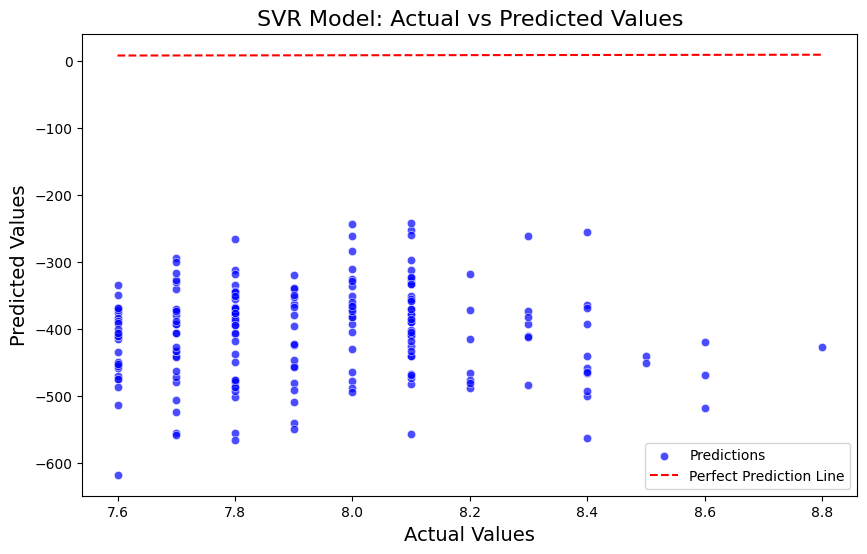

In [55]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plotting Actual vs Predicted values
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred, color='blue', label='Predictions', alpha=0.7)

# Plot the line of perfect predictions (y = x)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', label='Perfect Prediction Line')

# Labels and Title
plt.title('SVR Model: Actual vs Predicted Values', fontsize=16)
plt.xlabel('Actual Values', fontsize=14)
plt.ylabel('Predicted Values', fontsize=14)

# Display the plot
plt.legend()
plt.show()
